# 09 Predict the Leader

### Imports

In [1]:
from typing import List
import random

import csv
import matplotlib.pyplot as plt

### Making the Network from the CSV file

In [2]:
def make_graph(file_name: str) -> dict:
    with open(file_name, "r") as csv_file:
        csv_data = csv.reader(csv_file)
        # Take All Names of Nominations from 1st column.
        # Since 0th column is Title "Name"
        NOMINATIONS = next(csv_data)[1:]
        NETWORK = {name: [] for name in NOMINATIONS}

        for row in csv_data:
            votee = row[0]
            for idx, isVote in enumerate(row[1:]):
                if isVote == '1':
                    NETWORK[NOMINATIONS[idx]].append(votee)
    return NETWORK

In [3]:
NETWORK = make_graph("./data/TLP_Leader_Data.csv")

#### Network Test to match values

In [4]:
# Netwrok Check
assert NETWORK['Abdul Khader, Syed'] == ["Gupta, Aayush", "R K, Vysakh"], "Network is INCORRECT"

In [5]:
assert NETWORK['R K, Vysakh'] == ['Gupta, Aayush', 'Gowda, Adarsh', 'Narayan, Anchit', 'Sankar, Kirubananth', 
                                'Bhardwaj, Kunal', 'Walia, Muskaan', 'Krishna K, Pramod', 'Pandey, Savyasachi', 
                                'Pasricha, Stuti', 'Abdul Khader, Syed', 'Kumar Singh, Tejasvi', 'Pani, Tirtha', 
                                'Kumar, Vivek']

### Random Walk for `NUMBER_WALKS` times

In [6]:
pointer = random.choice(list(NETWORK.keys()))
visits = {k:0 for k,v in NETWORK.items()}
NUMBER_WALKS = 40_000
for _ in range(NUMBER_WALKS):
    pointer = random.choice(NETWORK[pointer])
    visits[pointer] += 1

### Plotting

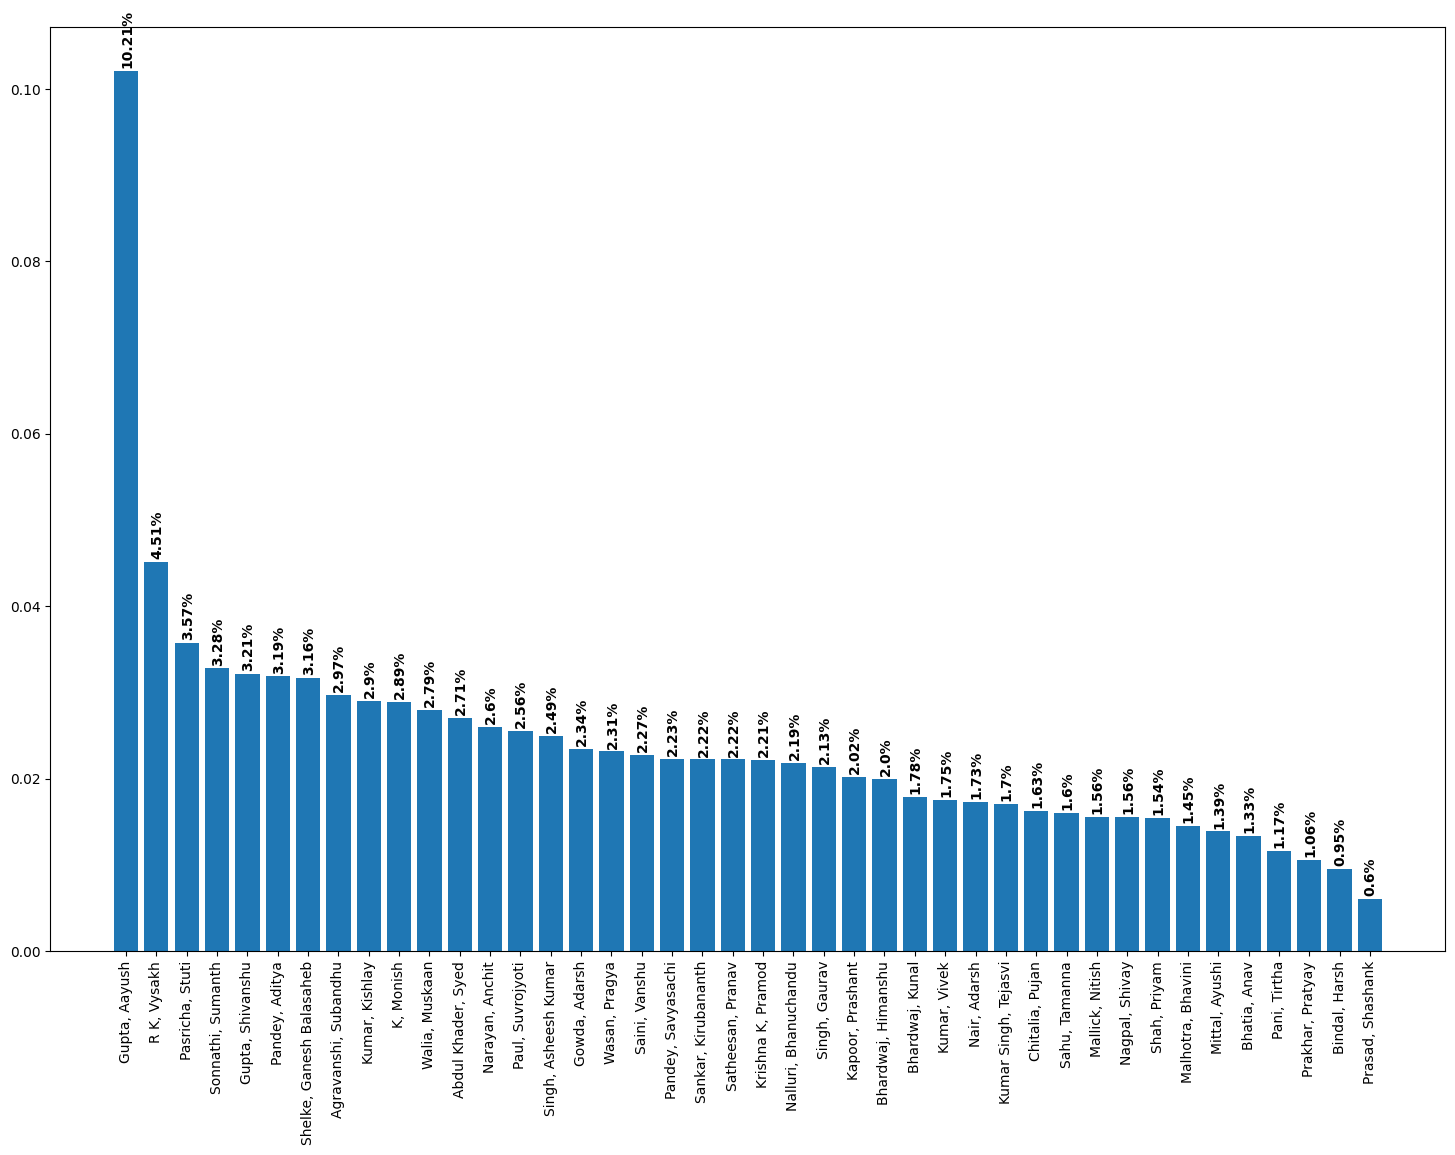

In [7]:
orderedVisits = sorted(visits.items(), key = lambda item: item[1], reverse=True)
nodes = [key for key,val in orderedVisits]
values = [val/NUMBER_WALKS for key,val in orderedVisits]

# The Adjust the Plot Size
plt.figure(figsize = (18,12))

# To Have the x-axis label as vertical
plt.xticks(rotation=90)

# Bar Graph
plt.bar(nodes, values)

# To plot the number value on each Bar
for i, v in enumerate(values):
    plt.text(i-0.2, v+0.0007, str(round(v*100,2))+"%", color='black', fontweight='bold', rotation=90)

plt.show()

#### Top 5 Standings

In [8]:
for idx, (name, percentageVoting) in enumerate(orderedVisits[:5]):
    print(f"{name} has Rank:{idx+1} with the vote percentage of: {round(percentageVoting/NUMBER_WALKS * 100,2)}%")

Gupta, Aayush has Rank:1 with the vote percentage of: 10.21%
R K, Vysakh has Rank:2 with the vote percentage of: 4.51%
Pasricha, Stuti has Rank:3 with the vote percentage of: 3.57%
Sonnathi, Sumanth has Rank:4 with the vote percentage of: 3.28%
Gupta, Shivanshu has Rank:5 with the vote percentage of: 3.21%


In [1]:
import numpy as np

In [2]:
np.genfromtxt?

Signature:
np.genfromtxt(
    fname,
    dtype=<class 'float'>,
    comments='#',
    delimiter=None,
    skip_header=0,
    skip_footer=0,
    converters=None,
    missing_values=None,
    filling_values=None,
    usecols=None,
    names=None,
    excludelist=None,
    deletechars=" !#$%&'()*+,-./:;<=>?@[\\]^{|}~",
    replace_space='_',
    autostrip=False,
    case_sensitive=True,
    defaultfmt='f%i',
    unpack=None,
    usemask=False,
    loose=True,
    invalid_raise=True,
    max_rows=None,
    encoding='bytes',
    *,
    ndmin=0,
    like=None,
)
Docstring:
Load data from a text file, with missing values handled as specified.

Each line past the first `skip_header` lines is split at the `delimiter`
character, and characters following the `comments` character are discarded.

Parameters
----------
fname : file, str, pathlib.Path, list of str, generator
    File, filename, list, or generator to read.  If the filename
    extension is ``.gz`` or ``.bz2``, the file is first decomp